## Splitting data into train and test folders

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
parent_dir =os.path.dirname(os.getcwd())
pheno_dir = os.path.join(parent_dir, 'phenotype_files')
df_path = os.path.join(pheno_dir, 'pheno_clean.csv')

In [7]:
%store parent_dir
%store pheno_dir
%store df_path

Stored 'parent_dir' (str)
Stored 'pheno_dir' (str)
Stored 'df_path' (str)


## Adding Multi-Class label and binarizing Target

In [8]:
df = pd.read_csv(df_path) # read phenotype file
df.head()

,SUB_ID,FILE_ID,AGE_AT_SCAN,SEX,DSM_IV_TR,DX_GROUP,FMRI_FILES,CC200,DFC_DATA_STORE
0,50002,Pitt_0050002,16.77,1,1,1,Pitt_0050002_func_preproc.nii.gz,Pitt_0050002_rois_cc200.1D,Pitt_0050002_dfc.pkl
1,50003,Pitt_0050003,24.45,1,1,1,Pitt_0050003_func_preproc.nii.gz,Pitt_0050003_rois_cc200.1D,Pitt_0050003_dfc.pkl
2,50004,Pitt_0050004,19.09,1,1,1,Pitt_0050004_func_preproc.nii.gz,Pitt_0050004_rois_cc200.1D,Pitt_0050004_dfc.pkl
3,50005,Pitt_0050005,13.73,2,1,1,Pitt_0050005_func_preproc.nii.gz,Pitt_0050005_rois_cc200.1D,Pitt_0050005_dfc.pkl
4,50006,Pitt_0050006,13.37,1,1,1,Pitt_0050006_func_preproc.nii.gz,Pitt_0050006_rois_cc200.1D,Pitt_0050006_dfc.pkl


In [29]:
df= df.loc[:,['FILE_ID','DSM_IV_TR','DX_GROUP']] # these columns are needed, the file ID and the two targets, binary: DX_Group, and Multi Class DSM_IV_TR
df.head()

,FILE_ID,DSM_IV_TR,DX_GROUP
0,Pitt_0050002,1,1
1,Pitt_0050003,1,1
2,Pitt_0050004,1,1
3,Pitt_0050005,1,1
4,Pitt_0050006,1,1


#### Target Classes
##### Binary : `DX_GROUP`
- 1: Autism
- 2: Control

##### Multi-class: `DSM_IV_TR`
- 0: Control
- 1: Autism
- 2: Aspergers
- 3: PDD-NOS (Pervasive Developmental Disorder-Not Otherwise Specified)
- 4: Aspergers or PDD-NOS

In [205]:
bin_labels = ['Autism','Control']
mult_labels = ['Nan','Control','Autism','Aspergers', 'PDD-NOS','Aspergers/PDD']

In [206]:
%store bin_labels
%store mult_labels

Stored 'bin_labels' (list)
Stored 'mult_labels' (list)


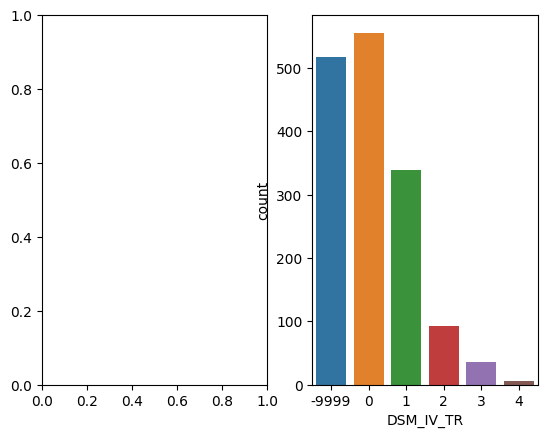

In [225]:
fig, (axis1,axis0) = plt.subplots(nrows=1,ncols=2)
axis0 = sns.countplot(df, x = 'DX_GROUP')
axis1 = sns.countplot(df, x = 'DSM_IV_TR')
plt.show()
plt.show()

Target classes are balanced, a 0.2 train/test split will be carried out using scikit-learn's train_test_split module
The multi-class labels are problematic the -9999 class is not mentioned in the ABIDE dataset details, and the classes are heavily unbalanced.

### What's happening with -9999 in DSM_IV_TR?

In [95]:
check_df = df[['FILE_ID','DX_GROUP', 'DSM_IV_TR']]

In [107]:
check_df.loc[0, 'FILE_ID']
len(_0050002)

'Pitt_0050002'

In [117]:
len('_0050002') #length of subject id string

8

In [120]:
non_standard = check_df[check_df["DSM_IV_TR"]== -9999]
site = [file[:-8] for file in non_standard['FILE_ID']] # remove subject id from file id leaving site id
non_standard['SITE'] = site # add site ids to the non_stadard dataframe
non_standard

/var/folders/0k/w62sf0c17hs15h730mmdkmj40000gn/T/ipykernel_811/3830846138.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_standard['SITE'] = site # add site ids to the non_stadard dataframe


,FILE_ID,DX_GROUP,DSM_IV_TR,SITE
99,SDSU_0050188,1,-9999,SDSU
102,SDSU_0050191,1,-9999,SDSU
192,UM_1_0050297,1,-9999,UM_1
197,UM_1_0050302,1,-9999,UM_1
810,Stanford_0051160,1,-9999,Stanford
811,Stanford_0051161,1,-9999,Stanford
812,Stanford_0051162,1,-9999,Stanford
813,Stanford_0051163,1,-9999,Stanford
814,Stanford_0051164,1,-9999,Stanford
815,Stanford_0051165,1,-9999,Stanford


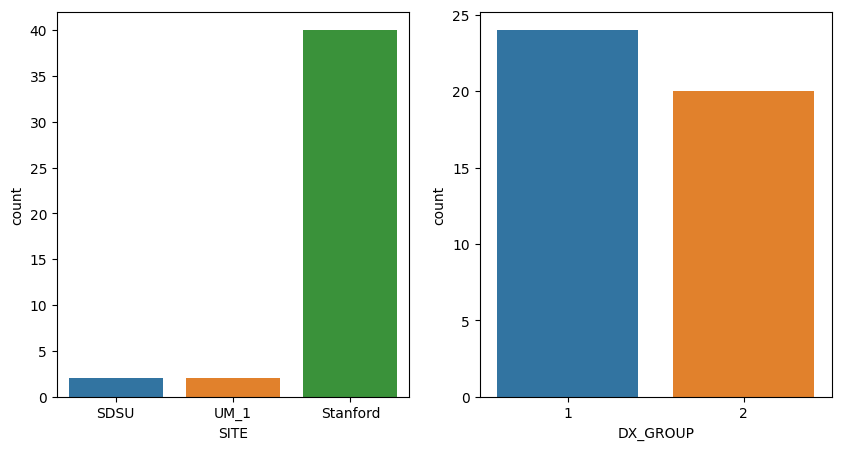

In [119]:
fig, (ax0,ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
sns.countplot(non_standard, x = 'SITE', ax =ax0) # number of non_standard entries in each site
sns.countplot(non_standard, x = 'DX_GROUP', ax =ax1)
plt.show()

In [126]:
non_standard_path = os.path.join(pheno_dir, 'multiclass_ns.csv') # save path for the non_standard file, save as multiclass_ns.csv
non_standard.to_csv(non_standard_path, index= False)

## Split data

In [30]:
features = df.columns.to_list() # all feature names
y = df[features[-1]] # target feature 'DX_GROUP'
X = df[features[:-1]]# independent variables

In [32]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42) # split into train and test sets

In [33]:
print(f"Train test target: \n{y_train.value_counts()} \n Test set target \n{y_test.value_counts()}")

Train test target: 
2    445
1    414
Name: DX_GROUP, dtype: int64 
 Test set target 
2    111
1    104
Name: DX_GROUP, dtype: int64


In [34]:
X_train['TARGET']= y_train # merge X and y train sets into one dataframe for saving

In [35]:
X_test['TARGET']= y_test# merge X and y test sets into one dataframe for saving

In [36]:
train_df = X_train.reset_index(drop=True)
test_df = X_test.reset_index(drop=True)

In [37]:
train_path = os.path.join(parent_dir, 'phenotype_files/train_df.csv')
test_path = os.path.join(parent_dir,'phenotype_files/test_df.csv')

In [38]:
train_df.to_csv(train_path, index= False)
test_df.to_csv(test_path, index= False)

## Splitting data with no null values

In [9]:
# import the phenotype file with no null value timeseries data
nn_path = os.path.join(pheno_dir, 'pheno_nn.csv')
nn_df = pd.read_csv(nn_path)

In [10]:
nn_df.head()

,SUB_ID,FILE_ID,AGE_AT_SCAN,SEX,DSM_IV_TR,DX_GROUP,FMRI_FILES,CC200,DFC_DATA_STORE
0,50002,Pitt_0050002,16.77,1,1,1,Pitt_0050002_func_preproc.nii.gz,Pitt_0050002_rois_cc200.1D,Pitt_0050002_dfc.pkl
1,50003,Pitt_0050003,24.45,1,1,1,Pitt_0050003_func_preproc.nii.gz,Pitt_0050003_rois_cc200.1D,Pitt_0050003_dfc.pkl
2,50004,Pitt_0050004,19.09,1,1,1,Pitt_0050004_func_preproc.nii.gz,Pitt_0050004_rois_cc200.1D,Pitt_0050004_dfc.pkl
3,50005,Pitt_0050005,13.73,2,1,1,Pitt_0050005_func_preproc.nii.gz,Pitt_0050005_rois_cc200.1D,Pitt_0050005_dfc.pkl
4,50006,Pitt_0050006,13.37,1,1,1,Pitt_0050006_func_preproc.nii.gz,Pitt_0050006_rois_cc200.1D,Pitt_0050006_dfc.pkl


In [11]:
nn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SUB_ID          1026 non-null   int64  
 1   FILE_ID         1026 non-null   object 
 2   AGE_AT_SCAN     1026 non-null   float64
 3   SEX             1026 non-null   int64  
 4   DSM_IV_TR       1026 non-null   int64  
 5   DX_GROUP        1026 non-null   int64  
 6   FMRI_FILES      1026 non-null   object 
 7   CC200           1026 non-null   object 
 8   DFC_DATA_STORE  1026 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 72.3+ KB


In [12]:
nn_df= nn_df.loc[:,['SUB_ID','FILE_ID','DX_GROUP']]

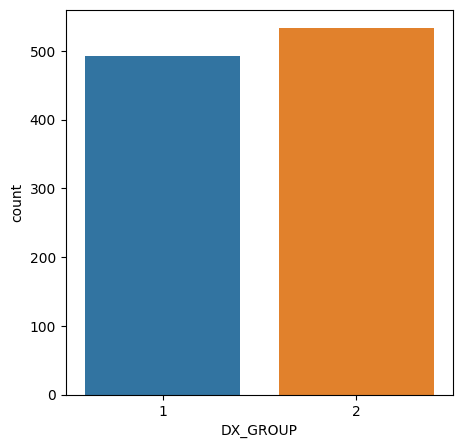

In [13]:
plt.figure(figsize=(5,5))
sns.countplot(nn_df, x = 'DX_GROUP')
plt.show()

The removal of subjects with null values did not seem to unduly affect the ratio between the two dignostic classes

In [14]:
features = nn_df.columns.to_list()  # all feature names
nn_y = nn_df[features[-1]]  # target feature 'DX_GROUP'
nn_X = nn_df[features[:-1]]  # independent variables
X_nntrain, X_nntest, y_nntrain, y_nntest = train_test_split(nn_X, nn_y, test_size=0.2,
                                                    random_state=42)  # split into train and test sets
print(f"Train test target: \n{y_nntrain.value_counts()} \n Test set target \n{y_nntest.value_counts()}")

Train test target: 
2    421
1    399
Name: DX_GROUP, dtype: int64 
 Test set target 
2    112
1     94
Name: DX_GROUP, dtype: int64


In [15]:
X_nntrain['TARGET']= y_nntrain # merge X and y train sets into one dataframe for saving

In [16]:
X_nntest['TARGET']= y_nntest# merge X and y test sets into one dataframe for saving

In [17]:
train_nn = X_nntrain.reset_index(drop=True)
test_nn = X_nntest.reset_index(drop=True)

#### Binarize the target class

In [13]:
def binarize(df):
    new_target = [1 if x == 1 else 0 for x in df['TARGET']]  # turn target in to binary
    df['TARGET'] = new_target
    return df

In [20]:
train_nn,test_nn =map(binarize, [train_nn,test_nn]) # map binarise function over dataframes and save in variables

In [21]:
train_nnpath = os.path.join(pheno_dir, 'train_nn.csv')
test_nnpath = os.path.join(pheno_dir,'test_nn.csv')


In [22]:
train_nn.to_csv(train_nnpath, index= False)
test_nn.to_csv(test_nnpath, index= False)


## Split for multiclass classification

SInce the multiclass labels are imbalanced I shall use stratified sampling for splitting into train and test sets.

I will also use Complement cross entropy as a loss function during training (Kim et al. 2019) `https://arxiv.org/pdf/2009.02189.pdf`

In [146]:
# import the phenotype file with no null value timeseries data
nn_path = os.path.join(pheno_dir, 'pheno_nn.csv')
nn_df = pd.read_csv(nn_path)

In [158]:
nn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SUB_ID          1026 non-null   int64  
 1   FILE_ID         1026 non-null   object 
 2   AGE_AT_SCAN     1026 non-null   float64
 3   SEX             1026 non-null   int64  
 4   DSM_IV_TR       1026 non-null   int64  
 5   DX_GROUP        1026 non-null   int64  
 6   FMRI_FILES      1026 non-null   object 
 7   CC200           1026 non-null   object 
 8   DFC_DATA_STORE  1026 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 72.3+ KB


In [153]:
ns_index = nn_df[nn_df['DSM_IV_TR']== -9999].index # all subjects with a non-standard multi-class lavel

In [245]:
mc_df = nn_df.drop(ns_index) # drop non-standard subjects
mc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 0 to 1025
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SUB_ID          982 non-null    int64  
 1   FILE_ID         982 non-null    object 
 2   AGE_AT_SCAN     982 non-null    float64
 3   SEX             982 non-null    int64  
 4   DSM_IV_TR       982 non-null    int64  
 5   DX_GROUP        982 non-null    int64  
 6   FMRI_FILES      982 non-null    object 
 7   CC200           982 non-null    object 
 8   DFC_DATA_STORE  982 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 76.7+ KB


In [228]:
mult_labels_nn = mult_labels[1:] # remove NAN from labels
mult_labels_nn

['Control', 'Autism', 'Aspergers', 'PDD-NOS', 'Aspergers/PDD']

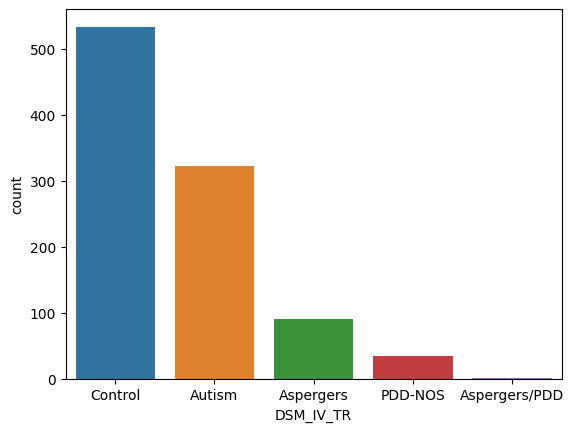

In [232]:
plt.Figure()
sns.countplot(data = mc_df, x ='DSM_IV_TR')
plt.xticks(range(5),labels =mult_labels_nn)
plt.show()

In [42]:
(2* 200) / 60

6.666666666666667

In [235]:
mc_df['DSM_IV_TR'].value_counts() # only one count of label four Aspergers or PDD-NOS. this will make stratified sample harder, so remove.

0    533
1    322
2     91
3     35
4      1
Name: DSM_IV_TR, dtype: int64

In [239]:
ind4 = mc_df[mc_df['DSM_IV_TR']==4].index #index for sole 4 class
mc_df.drop(ind4, inplace =True ) # drop index

In [241]:
mc_df= mc_df.iloc[:,:5]
mc_df.reset_index(inplace = True, drop = True)# reset indexes

In [242]:
mc_features = mc_df.columns.to_list() # all feature names
y = mc_df[features[-1]] # target feature 'DSM_IV_TR'
X = mc_df[features[:-1]]# independent variables

In [243]:
X

,SUB_ID,FILE_ID,AGE_AT_SCAN,SEX
0,50002,Pitt_0050002,16.77,1
1,50003,Pitt_0050003,24.45,1
2,50004,Pitt_0050004,19.09,1
3,50005,Pitt_0050005,13.73,2
4,50006,Pitt_0050006,13.37,1
...,...,...,...,...
976,51583,SBL_0051583,35.00,1
977,51584,SBL_0051584,49.00,1
978,51585,SBL_0051585,27.00,1
979,51606,MaxMun_a_0051606,29.00,2


In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.20)

In [251]:
y_train.value_counts()

0    426
1    257
2     73
3     28
Name: DSM_IV_TR, dtype: int64

In [253]:
y_test.value_counts()

0    107
1     65
2     18
3      7
Name: DSM_IV_TR, dtype: int64

In [255]:
X_train['TARGET']= y_train # add target columns for both sets
X_test['TARGET']= y_test

In [260]:
multi_train = X_train[['FILE_ID','TARGET']].reset_index(drop=True)
multi_test = X_test[['FILE_ID','TARGET']].reset_index(drop=True)

In [259]:
multi_train

,FILE_ID,TARGET
0,CMU_a_0050647,1
1,UM_1_0050311,1
2,UM_1_0050331,0
3,NYU_0050992,1
4,MaxMun_d_0051353,2
...,...,...
779,MaxMun_a_0051321,2
780,UM_1_0050379,0
781,USM_0050531,1
782,SDSU_0050185,1


In [261]:
# save paths
m_train_path = os.path.join(pheno_dir, 'mc_train.csv')
m_test_path = os.path.join(pheno_dir, 'mc_test.csv')

In [262]:
multi_train.to_csv(m_train_path, index= False)
multi_test.to_csv(m_test_path, index= False)

# split AAL non null data

In [18]:
# import the phenotype file with no null value timeseries data
nn_aal_path = os.path.join(pheno_dir, 'aal_nn.csv')
nn_aal = pd.read_csv(nn_aal_path)

In [27]:
nn_aal.head()

,SUB_ID,FILE_ID,AGE_AT_SCAN,SEX,DSM_IV_TR,DX_GROUP,FMRI_FILES,CC200,DFC_DATA_STORE
0,50002,Pitt_0050002,16.77,1,1,1,Pitt_0050002_func_preproc.nii.gz,Pitt_0050002_rois_cc200.1D,Pitt_0050002_dfc.pkl
1,50003,Pitt_0050003,24.45,1,1,1,Pitt_0050003_func_preproc.nii.gz,Pitt_0050003_rois_cc200.1D,Pitt_0050003_dfc.pkl
2,50005,Pitt_0050005,13.73,2,1,1,Pitt_0050005_func_preproc.nii.gz,Pitt_0050005_rois_cc200.1D,Pitt_0050005_dfc.pkl
3,50006,Pitt_0050006,13.37,1,1,1,Pitt_0050006_func_preproc.nii.gz,Pitt_0050006_rois_cc200.1D,Pitt_0050006_dfc.pkl
4,50008,Pitt_0050008,32.45,1,1,1,Pitt_0050008_func_preproc.nii.gz,Pitt_0050008_rois_cc200.1D,Pitt_0050008_dfc.pkl


In [28]:
nn_aal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SUB_ID          986 non-null    int64  
 1   FILE_ID         986 non-null    object 
 2   AGE_AT_SCAN     986 non-null    float64
 3   SEX             986 non-null    int64  
 4   DSM_IV_TR       986 non-null    int64  
 5   DX_GROUP        986 non-null    int64  
 6   FMRI_FILES      986 non-null    object 
 7   CC200           986 non-null    object 
 8   DFC_DATA_STORE  986 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 69.5+ KB


In [29]:
nn_aal= nn_aal.loc[:,['FILE_ID','DX_GROUP']]

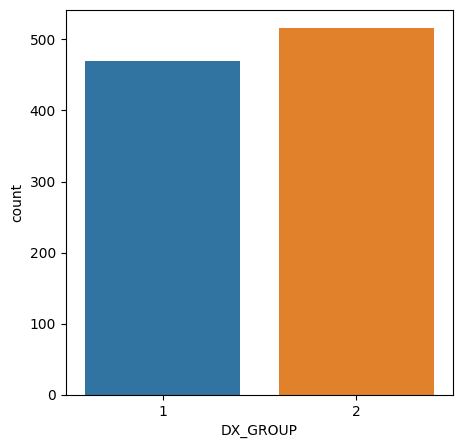

In [30]:
plt.figure(figsize=(5,5))
sns.countplot(nn_aal, x = 'DX_GROUP')
plt.show()

The removal of subjects with null values did not seem to unduly affect the ratio between the two dignostic classes

In [31]:
features = nn_aal.columns.to_list()  # all feature names
aal_y = nn_aal[features[-1]]  # target feature 'DX_GROUP'
aal_X = nn_aal[features[:-1]]  # independent variables
X_nntrain, X_nntest, y_nntrain, y_nntest = train_test_split(aal_X, aal_y, test_size=0.2,
                                                    random_state=42)  # split into train and test sets
print(f"Train test target: \n{y_nntrain.value_counts()} \n Test set target \n{y_nntest.value_counts()}")

Train test target: 
2    412
1    376
Name: DX_GROUP, dtype: int64 
 Test set target 
2    104
1     94
Name: DX_GROUP, dtype: int64


In [32]:
X_nntrain['TARGET']= y_nntrain # merge X and y train sets into one dataframe for saving

In [33]:
X_nntest['TARGET']= y_nntest# merge X and y test sets into one dataframe for saving

In [34]:
def binarize(df):
    new_target = [1 if x == 1 else 0 for x in df['TARGET']]  # turn target in to binary
    df['TARGET'] = new_target
    return df

In [35]:
train_aal,test_aal =map(binarize, [X_nntrain,X_nntest]) # map binarise function over dataframes and save in variables

In [36]:
train_aal = train_aal.reset_index(drop=True)
test_aal = test_aal.reset_index(drop=True)

In [37]:
train_aal_path = os.path.join(pheno_dir, 'train_aal.csv')
test_aal_path = os.path.join(pheno_dir, 'test_aal.csv')

In [38]:
train_aal.to_csv(train_aal_path, index=False)
test_aal.to_csv(test_aal_path, index=False)

## split AAL data into multiclass

In [21]:
mc_df_aal = nn_aal.copy()

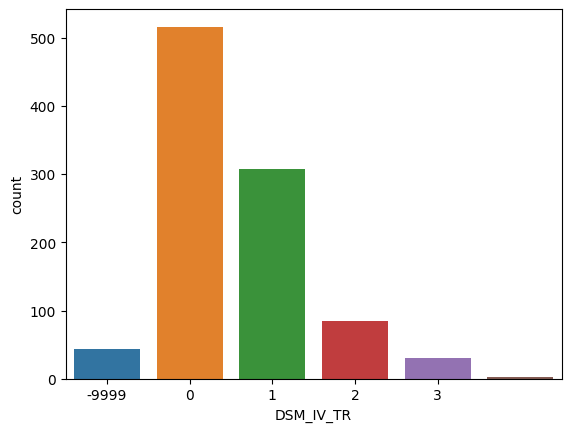

In [24]:
plt.Figure()
sns.countplot(data = mc_df_aal, x ='DSM_IV_TR')
plt.xticks(range(5))
plt.show()

In [23]:
mc_df_aal[(mc_df_aal['DSM_IV_TR']==-9999)]

,SUB_ID,FILE_ID,AGE_AT_SCAN,SEX,DSM_IV_TR,DX_GROUP,FMRI_FILES,CC200,DFC_DATA_STORE
80,50188,SDSU_0050188,15.4000,1,-9999,1,SDSU_0050188_func_preproc.nii.gz,SDSU_0050188_rois_cc200.1D,SDSU_0050188_dfc.pkl
83,50191,SDSU_0050191,12.6300,1,-9999,1,SDSU_0050191_func_preproc.nii.gz,SDSU_0050191_rois_cc200.1D,SDSU_0050191_dfc.pkl
167,50297,UM_1_0050297,15.9000,1,-9999,1,UM_1_0050297_func_preproc.nii.gz,UM_1_0050297_rois_cc200.1D,UM_1_0050297_dfc.pkl
172,50302,UM_1_0050302,10.4000,2,-9999,1,UM_1_0050302_func_preproc.nii.gz,UM_1_0050302_rois_cc200.1D,UM_1_0050302_dfc.pkl
763,51160,Stanford_0051160,7.9336,1,-9999,1,Stanford_0051160_func_preproc.nii.gz,Stanford_0051160_rois_cc200.1D,Stanford_0051160_dfc.pkl
764,51161,Stanford_0051161,9.0301,1,-9999,1,Stanford_0051161_func_preproc.nii.gz,Stanford_0051161_rois_cc200.1D,Stanford_0051161_dfc.pkl
765,51162,Stanford_0051162,8.9199,2,-9999,1,Stanford_0051162_func_preproc.nii.gz,Stanford_0051162_rois_cc200.1D,Stanford_0051162_dfc.pkl
766,51163,Stanford_0051163,9.0821,1,-9999,1,Stanford_0051163_func_preproc.nii.gz,Stanford_0051163_rois_cc200.1D,Stanford_0051163_dfc.pkl
767,51164,Stanford_0051164,8.4216,2,-9999,1,Stanford_0051164_func_preproc.nii.gz,Stanford_0051164_rois_cc200.1D,Stanford_0051164_dfc.pkl
768,51165,Stanford_0051165,11.8433,1,-9999,1,Stanford_0051165_func_preproc.nii.gz,Stanford_0051165_rois_cc200.1D,Stanford_0051165_dfc.pkl


In [25]:
ind4_aal = mc_df_aal[(mc_df_aal['DSM_IV_TR']==-9999)].index #index for sole 4 class
mc_df_aal.drop(ind4_aal, inplace =True ) # drop index

In [26]:
mc_df_aal

,SUB_ID,FILE_ID,AGE_AT_SCAN,SEX,DSM_IV_TR,DX_GROUP,FMRI_FILES,CC200,DFC_DATA_STORE
0,50002,Pitt_0050002,16.77,1,1,1,Pitt_0050002_func_preproc.nii.gz,Pitt_0050002_rois_cc200.1D,Pitt_0050002_dfc.pkl
1,50003,Pitt_0050003,24.45,1,1,1,Pitt_0050003_func_preproc.nii.gz,Pitt_0050003_rois_cc200.1D,Pitt_0050003_dfc.pkl
2,50005,Pitt_0050005,13.73,2,1,1,Pitt_0050005_func_preproc.nii.gz,Pitt_0050005_rois_cc200.1D,Pitt_0050005_dfc.pkl
3,50006,Pitt_0050006,13.37,1,1,1,Pitt_0050006_func_preproc.nii.gz,Pitt_0050006_rois_cc200.1D,Pitt_0050006_dfc.pkl
4,50008,Pitt_0050008,32.45,1,1,1,Pitt_0050008_func_preproc.nii.gz,Pitt_0050008_rois_cc200.1D,Pitt_0050008_dfc.pkl
...,...,...,...,...,...,...,...,...,...
981,51574,SBL_0051574,30.00,1,2,1,SBL_0051574_func_preproc.nii.gz,SBL_0051574_rois_cc200.1D,SBL_0051574_dfc.pkl
982,51576,SBL_0051576,31.00,1,3,1,SBL_0051576_func_preproc.nii.gz,SBL_0051576_rois_cc200.1D,SBL_0051576_dfc.pkl
983,51581,SBL_0051581,64.00,1,3,1,SBL_0051581_func_preproc.nii.gz,SBL_0051581_rois_cc200.1D,SBL_0051581_dfc.pkl
984,51606,MaxMun_a_0051606,29.00,2,2,1,MaxMun_a_0051606_func_preproc.nii.gz,MaxMun_a_0051606_rois_cc200.1D,MaxMun_a_0051606_dfc.pkl


In [39]:

y = mc_df_aal['DSM_IV_TR'] # target feature 'DSM_IV_TR'
X = mc_df_aal[['FILE_ID', 'DX_GROUP']]  # independent variables
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y,
                                                    test_size=0.20)

In [40]:
X_train

,FILE_ID,DX_GROUP
491,Leuven_2_0050726,2
860,UCLA_1_0051266,2
651,NYU_0051039,2
456,CMU_a_0050666,2
318,USM_0050463,2
...,...,...
940,MaxMun_d_0051358,2
534,KKI_0050785,2
212,UM_1_0050342,2
417,Yale_0050602,1


In [41]:
X_train['TARGET']= y_train # add target columns for both sets
X_test['TARGET']= y_test

In [43]:
multi_train_aal = X_train[['FILE_ID','TARGET']].reset_index(drop=True)
multi_test_aal = X_test[['FILE_ID','TARGET']].reset_index(drop=True)

In [44]:
multi_train_aal

,FILE_ID,TARGET
0,Leuven_2_0050726,0
1,UCLA_1_0051266,0
2,NYU_0051039,0
3,CMU_a_0050666,0
4,USM_0050463,0
...,...,...
748,MaxMun_d_0051358,0
749,KKI_0050785,0
750,UM_1_0050342,0
751,Yale_0050602,2


In [48]:
mc_aal_path = os.path.join(pheno_dir, 'mc_aal.csv')
mctrain_aal_path = os.path.join(pheno_dir, 'train_aal_mc.csv')
mctest_aal_path = os.path.join(pheno_dir, 'test_aal_mc.csv')

In [49]:
mc_df_aal.to_csv(mc_aal_path, index=False)
multi_train_aal.to_csv(mctrain_aal_path, index=False)
multi_test_aal.to_csv(mctest_aal_path, index=False)